<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
مطالعه‌ی بازار‌های هدف
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    در این گام از پروژه کشورها را از نظر میزان فروش و تعداد مشتریان گروه‌بندی خواهید کرد و با رسم یک نمودار کاربردی به تحلیل محل فروش و عرضه خواهید پرداخت.
</font>
</p>

   
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
کتابخانه‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
       ابتدا کتابخانه‌های مورد نیاز خود را فرا بخوانید.
</font>
</p>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
    خواندن مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    حال داده‌های پیش‌پردازش‌شده را که در گام اول پروژه در فایل <code>preprocessed_sales.csv</code> ذخیره کردید به شکل یک دیتافریم بخوانید.
</font>
</p>

In [34]:
df = pd.read_csv("preprocessed_sales.csv")
df.head()

InvoiceNumber ProductCode                          ProductName  Quantity  \
0         489434       85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1         489434      79323P                   PINK CHERRY LIGHTS        12   
2         489434      79323W                  WHITE CHERRY LIGHTS        12   
3         489434       22041         RECORD FRAME 7" SINGLE SIZE         48   
4         489434       21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  UnitPrice  CustomerId         Country  
0  2009-12-01 07:45:00       6.95     13085.0  United Kingdom  
1  2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
2  2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
3  2009-12-01 07:45:00       2.10     13085.0  United Kingdom  
4  2009-12-01 07:45:00       1.25     13085.0  United Kingdom


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
رسم نمودار پراکندگی میزان فروش و تعداد مشتریان کشورها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در این گام بر روی یک نمودار پراکندگی، کشورهای مختلف را براساس میزان فروش و تعداد مشتریان آن‌ها نشان می‌دهیم. علاوه‌براین کشورها را با توجه به میزان فروش و تعداد مشتریان به ۴ گروه تقسیم می‌کنیم و رنگ نقاط مربوط به کشورها را براساس گروه‌شان تعیین می‌کنیم.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
اگر میزان فروش را با <code>SA</code> و چارک سومش را با <code>qSA</code>، تعداد مشتری‌ها را با <code>CC</code> و چارک سومش را با <code>qCC</code> نشان دهیم، ۴ گروه از کشورها به شکل زیر تعریف می‌شوند.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>

| <b>شماره گروه</b> | <b>عنوان گروه</b> | <b>شرط</b> | <b>رنگ</b> |
| :---: | :---: | :---: | :---: |
| ۱ | Highest customer & revenue | <code dir=ltr>SA > qSA</code> و <code dir=ltr>CC > qCC</code> | <code>red</code> |
| ۲ | High customer & low revenue | <code dir=ltr>SA < qSA</code> و <code dir=ltr>CC > qCC</code> | <code>blue</code> |
| ۳ | High revenue & low customer | <code dir=ltr>SA > qSA</code> و <code dir=ltr>CC < qCC</code> | <code>green</code> |
| ۴ | Low customer & revenue | <code dir=ltr>SA < qSA</code> و <code dir=ltr>CC < qCC</code> | <code>cyan</code> |

</font>
</div>
</center>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
برای رسم نمودار باید مراحل زیر را طی کنید:

<ol dir =rtl>
  <li>ابتدا سفارش‌های مربوط به کشور United Kingdom را حذف کنید.</li>
  <li>به ازای هر کشور، تعداد مشتری یکتا و میزان فروش را محاسبه کنید.</li>
  <li>چارک سوم را برای میزان فروش و تعداد مشتری به دست آورید.</li>
  <li>با استفاده از توضیحات بالا، کشورها را به چهار گروه تقسیم کنید.</li>
  <li>در ادامه، با استفاده از اطلاعاتی که به دست آورده‌اید، نمودار زیر را رسم کنید.</li>
</ol>

</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>

| <b style="color:#0099cc">ویژگی</b> | <b style="color:#0099cc">مقدار</b> |
| :---: | :---: |
| اندازه‌ی شکل | ۱۰ در ۱۰ اینچ |
| اندازه‌ی فونت عنوان شکل | ۱۸ |
| اندازه‌ی فونت محور افقی و عمودی | ۱۶ |
| اندازه‌ی نقاط | ۲۰ |
| استایل | <code>fivethirtyeight</code> | 

</font>
</div>
</center>

<p dir=rtl align=right style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در انتها باید کشورهای فرانسه، اسپانیا و هلند را روی نقشه نمایش دهید. یعنی،‌ نام آن‌ها را روی نقاطی که این کشورها را نشان می‌دهند، رسم کنید. موقعیت متن‌ها همان موقعیت نقاط کشورها می‌باشد با این تفاوت که در محور عمودی، موقعیت متن‌ها نیم واحد (<code dir=ltr>+0.5</code>) افزایش یافته است. اندازه‌ی فونت این متن‌ها، ۱۵ می‌باشد.

</font>
</p>

<p style="text-align:center;"><img src="output.png"></p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
<span style="color:purple"><b>نکته ۱:</b></span>
تمام اجزای نمودار شما همچون  عنوان اصلی، عنوان محور افقی و عمودی و غیره باید دقیقاً همچون تصویر بالا باشد.
<br>
<span style="color:purple"><b>نکته ۲:</b></span>
توجه داشته باشید که برای محاسبه‌ی میزان فروش باید از حاصل‌ضرب دو ستون <code>UnitPrice</code> و <code>Quantity</code> استفاده کنید.
</font>
</p>

<h3 dir = rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
نکات مربوط به <code>legend</code>
</font>
</h3>

<p dir=rtl align=right style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
<code>legend</code> این نمودار کمی با نمونه‌هایی که پیش از این دیدید فرق دارد. در اینجا، <code>legend</code> استفاده‌شده دارای عنوان و قاب می‌باشد. عنوان <code>legend</code> با استفاده از پارامتر  <code>title</code> انتخاب می‌شود. با <code>True</code> کردن پارامتر <code>frameon</code> قاب لازم برای <code>legend</code> نمایش داده می‌شود.
برای تغییر اندازه‌ی فونت عنوان و رنگ زمینه‌ی قاب می‌توانید از پارامترهای <code>title_fontsize</code> و <code>facecolor</code> استفاده کنید.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>

| <b style="color:#0099cc">ویژگی</b> | <b style="color:#0099cc">مقدار</b> |
| :---: | :---: |
| رنگ زمینه‌ی قاب | <code>silver</code> |
| اندازه‌ی فونت عنوان | ۱۶ |
| اندازه‌ی فونت متن‌ها | ۱۴ |

</font>
</div>
</center>

In [ ]:
df_without_uk = df.copy()
df_without_uk = df_without_uk[df_without_uk["Country"] != "United Kingdom"]
df_without_uk["Total"] = df_without_uk["Quantity"] * df_without_uk["UnitPrice"]
df_without_uk = (
    df_without_uk.groupby("Country")
    .agg(
        Total=("Total", "sum"),
        Customer_count=("CustomerId", "nunique"),
    )
    .reset_index()
)

qSA = df_without_uk["Total"].quantile(0.75)
qCC = df_without_uk["Customer_count"].quantile(0.75)


def categorize_country(row):
    if row["Customer_count"] > qCC and row["Total"] > qSA:
        return "Highest customer & revenue"
    elif row["Customer_count"] > qCC and row["Total"] < qSA:
        return "High customer & low revenue"
    elif row["Customer_count"] < qCC and row["Total"] > qSA:
        return "High revenue & low customer"
    else:
        return "Low customer & revenue"


df_without_uk["Group"] = df_without_uk.apply(categorize_country, axis=1)
group_color_map = {
    "Highest customer & revenue": "red",
    "High customer & low revenue": "blue",
    "High revenue & low customer": "green",
    "Low customer & revenue": "cyan",
}
df_without_uk["Color"] = df_without_uk["Group"].map(group_color_map)
df_without_uk.head()

Country     Total  Customer_count                        Group Color
0  Australia  31446.80              15      High customer & revenue   red
1    Austria  13414.33              10       Low customer & revenue  cyan
2    Bahrain    805.97               2       Low customer & revenue  cyan
3    Belgium  24537.58              17  High customer & low revenue  blue
4     Brazil    268.27               1       Low customer & revenue  cyan

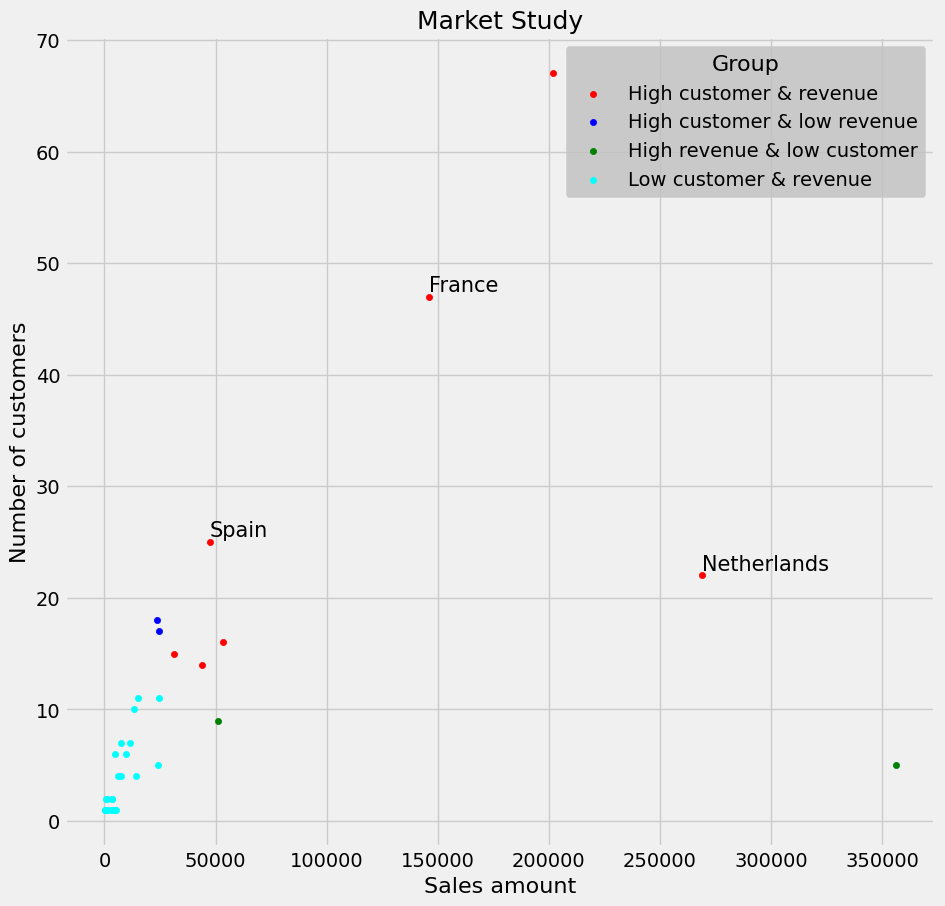

In [ ]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(10, 10))
for group, color in group_color_map.items():
    group_data = df_without_uk[df_without_uk["Group"] == group]
    ax.scatter(
        group_data["Total"], group_data["Customer_count"], c=color, s=20, label=group
    )
ax.legend(
    title="Group",
    title_fontsize=16,
    fontsize=14,
    frameon=True,
    facecolor="silver",
    loc="upper right",
)
for country in ["France", "Spain", "Netherlands"]:
    country_data = df_without_uk[df_without_uk["Country"] == country]
    x = country_data["Total"].values[0]
    y = country_data["Customer_count"].values[0] + 0.5
    ax.text(x, y, country, fontsize=15)
ax.set_title("Market Study", fontsize=18)
ax.set_xlabel("Sales amount", fontsize=16)
ax.set_ylabel("Number of customers", fontsize=16)
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [37]:
import zipfile
import joblib

joblib.dump(fig,"fig")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["fig", "final_project_3_market_study.ipynb"]
compress(file_names)

File Paths:
['fig', 'final_project_3_market_study.ipynb']
